In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# helper for gradient checking
def approximate_gradient(x, func, eps=1e-5):
    res = np.zeros(x.size)
    
    for i in range(x.size):
        d = np.zeros(x.size)
        d[i] = eps
        
        res[i] = (func(x + d) - func(x - d)) / (2 * eps)
    
    return res

# Chapter 1

## Polynomial Curve Fitting

Formula (1.4)

$$
    J = \frac{1}{2} \sum_n (w x^n - y^n)^2 + \frac{\lambda}{2} w^2
$$

Optimium at:

$$
\begin{eqnarray}
    \frac{\partial}{\partial w_i} J 
    &=& \sum_{nj} (w_j x^n_j - y^n) x_i + \lambda w_i \\
    &=& \sum_{jn} x^n_i x^n_j w_j - \sum_n y^n x^n_i + \lambda w_i
    &=& (X^T X + \lambda) w - X^T y
\end{eqnarray}
$$

with $X_{nj} = x^n_j$

Optimum at:

$$
    w^\star = (X^T X + \lambda)^{-1} X^T y
$$

In [3]:
def design_matrix(x, order=3):
    res = np.concatenate([x[None, :] ** n for n in range(order)])
    return res.T

def fit(X, y, lam):
    return np.linalg.inv(X.T @ X + lam) @ X.T @ y

(-2, 2)

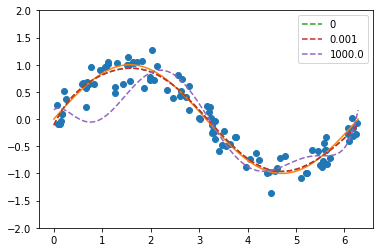

In [4]:
n_samples = 100
order = 8
regularization = [0, 1e-3, 1e3]

x = np.random.uniform(0, 2 * np.pi, size=n_samples)
y = np.random.normal(np.sin(x), scale=0.2)
ux = np.linspace(0, 2 * np.pi, 100)
uy = np.sin(ux)

plt.plot(x, y, 'o')
plt.plot(ux, uy)

for reg in regularization:
    plt.plot(ux, design_matrix(ux, order) @ fit(design_matrix(x, order), y, lam=reg), '--', label=f'{reg}')

plt.legend(loc='best')
plt.ylim(-2, 2)

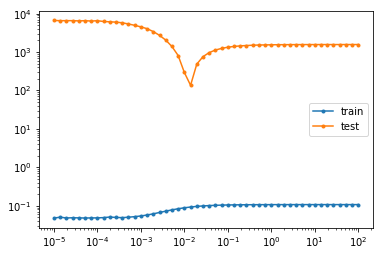

In [5]:
np.random.seed(21)

n_samples = 10
order = 9

x_train = np.random.uniform(0, 2 * np.pi, size=n_samples)
y_train = np.random.normal(np.sin(x_train), scale=0.2)

x_test = np.random.uniform(0, 2 * np.pi, size=1000)
y_test = np.random.normal(np.sin(x_test), scale=0.2)


regularization = np.logspace(-5, 2, 50)
rmse_train = []
rmse_test = []

for reg in regularization:
    w = fit(design_matrix(x_train, order), y_train, lam=reg)
    pred_train = design_matrix(x_train, order) @ w
    pred_test = design_matrix(x_test, order) @ w
    
    rmse_train.append(np.std(y_train - pred_train))
    rmse_test.append(np.std(y_test - pred_test))
    
plt.figure()
plt.plot(regularization, rmse_train, label='train', marker='.')
plt.plot(regularization, rmse_test, label='test', marker='.')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## Probability theory

> In both the Bayesian and frequentist paradigms, the likelihood function p(D|w) plays a central role. 
> However, the manner in which it is used is fundamentally different in the two approaches. 
> In a frequentist setting, w is considered to be a fixed parameter, whose value is determined 
> by some form of ‘estimator’, and error bars on this estimate are obtained by considering the 
> distribution of possible data sets D. By contrast, from the Bayesian viewpoint there is only a 
> single data set D (namely the one that is actually observed), and the uncertainty in the 
> parameters is expressed through a probability distribution over w.

### Maximum Likelihood of Gaussian Distribution

$$
\begin{eqnarray}
    \hat{\mu} &=& \frac{1}{N} \sum_n x_n \\
    \hat{\sigma} &=& \frac{1}{N} \sum_n (x_n - \hat{\mu})^2
\end{eqnarray}
$$

Unbiased mean estimate:

$$
    \mathbb{E} \hat{mu} = \frac{1}{N} \sum_n \mathbb{E} x_n = \mu
$$

Biased variance estimate:

$$
\begin{eqnarray}
    \mathbb{E} \hat{\sigma} 
        &=& \frac{1}{N} \sum_n \mathbb{E} (x_n - \hat{\mu})^2 \\
        &=& \frac{1}{N} \sum_n  \mathbb{E} x_n^2 - \mathbb{E} \hat{\mu}^2) \\
        &=& \mu^2 + \sigma^2 - \frac{1}{N^2} \mathbb{E} \sum_{mn} x_n x_m \\
        &=& \mu^2 + \sigma^2 - \frac{1}{N^2} \sum_{mn} (\mu^2 + \delta_{nm} \sigma^2) \\
        &=& \sigma^2 - \frac{1}{N} \sigma^2 \\
        &=& \frac{N - 1}{N} \sigma^2
\end{eqnarray}
$$

## Model Selection

## The curse of dimensionality 

## Decision Theory

Naive Bayes for combining models. Assume two models for cancer prevalence based on images 
$P(C|x_I)$ and on blood tests $P(C|x_B)$. Assume given the class the joint factorizes as

$$
    P(C, x_I, x_B) = P(x_I|C) P(x_B|C) P(C)
$$

Note that for each model: $P(x_I|C) = P(C|x_I) / P(C)$

Bayes rule gives the posterior as:

$$
\begin{eqnarray}
    P(C| x_i, x_b) 
        &\propto& P(x_i|C) p(x_b|C) P(C) \\
        &=& P(C|x_I) p(C|x_B) / P(C)
\end{eqnarray}
$$

## Infomration theory